In [ ]:
# Vehicle type Classification case study
# The purpose of the case study is to classify a given silhouette image as one of four different types of vehicle, 
# using a set of features extracted from the silhouette images


In [3]:
# importing Libraries ( pandas as dataframe , numpy for array type analysis , matplotlib for visualization)
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [120]:
# reading data as pandas dataframe
data = pd.read_csv('vehicle.csv')

In [121]:
# Looking at first five records
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [99]:
# Shape of the data i.e no of records (846) and no of features (19)
data.shape

(846, 19)

In [100]:
# taking insight of the attributes 
data.info()
# Looking at the data info not all the attributes are having 846 records which means there are missing values which needs to be treated 
# The target variable is 'class' which is of object type which contains vehicle type (car , bus ,van)
# All other attributes are of type float or int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [101]:
# descriptive analysis of data ( mean , median ,quartile min max )
data.describe().T
# Some of the attributes are having right skewness ( mean > median) like 'distance_circularity','radius_ratio','scatter_ratio'
# Attributes which are left skewwed ( mean < median) like elongatedness , hollows_ratio only two of them 

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [103]:
# looking at the counts of records based on different class
data['class'].value_counts()
# car type is having max records , It can be said the entire data is having higher chances of predicting car types 
# in other words the data set is biased for car type 

car    429
bus    218
van    199
Name: class, dtype: int64

In [105]:
data.groupby('class').size()

class
bus    218
car    429
van    199
dtype: int64

In [71]:
# finding the missing value counts in each attributes
data.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [122]:
lst = data.columns
# making a copy of the data set
data1 = data.copy()
for i in lst:
    if i != 'class':
        data1[i] = data1[i].fillna(data1[i].median())
# Treating missing values with the median of the attribute        
        

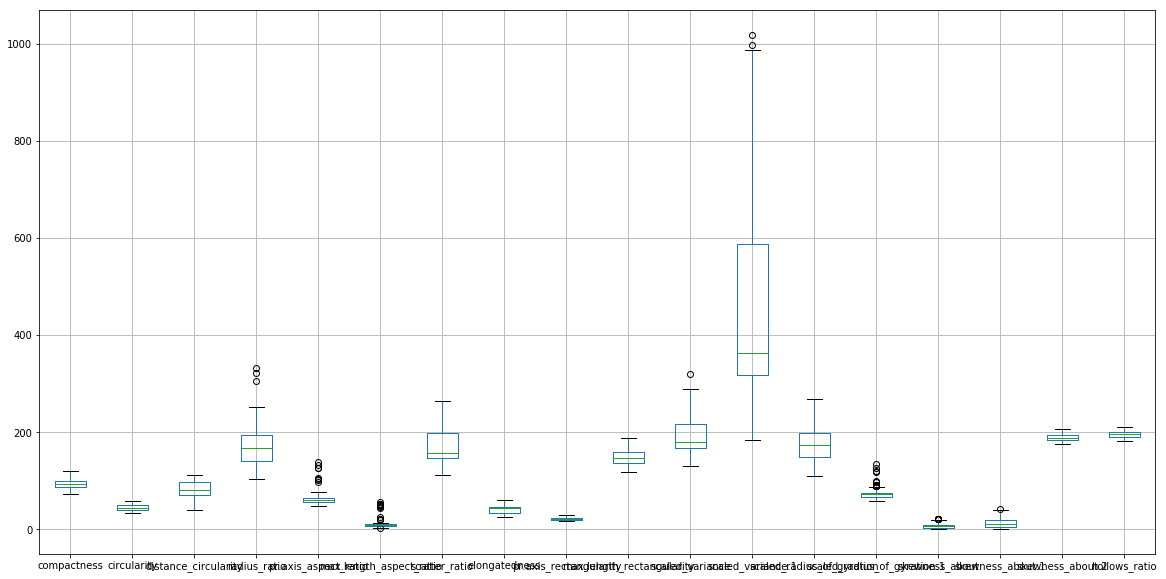

In [182]:
# Box plot before imputing missing values
# Outliers can be seen from the plt 
# It can be infer from the plot that some features are having near gaussian curve whicle some are skeewed 
data.boxplot(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001992AB5FA90>,
      dtype=object)

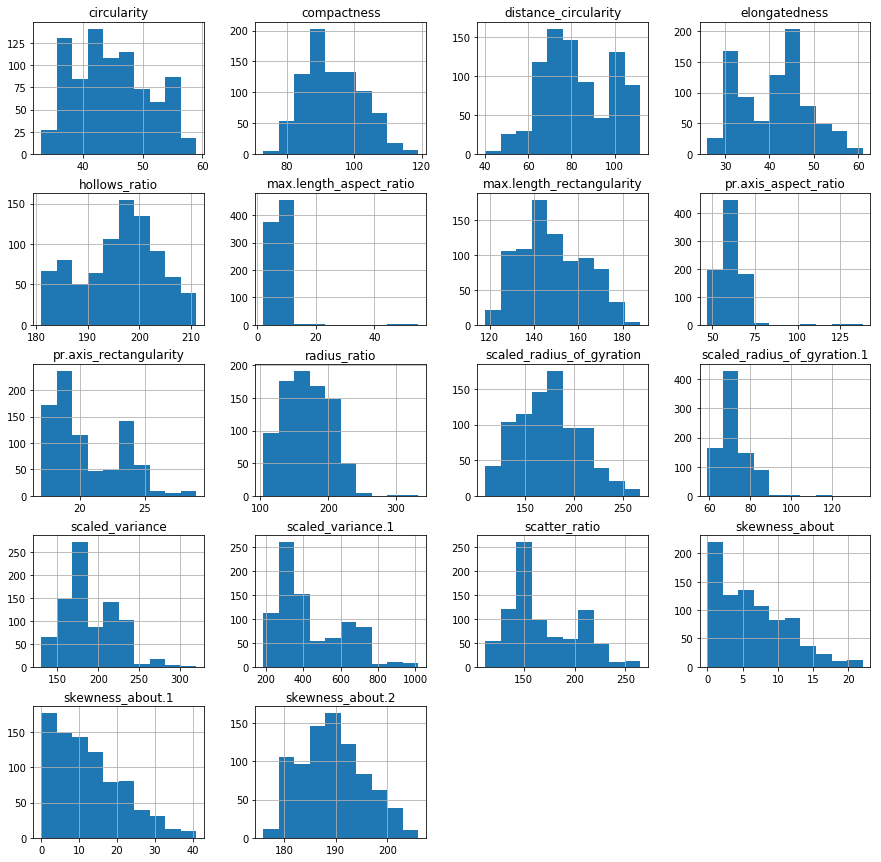

In [183]:
# Histogram of the dataset
data.hist(figsize=(15,15))

In [125]:
# confirming data after working with missing data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [126]:
# confirming data after working with missing data
data1.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [145]:
for i in data1.columns[:-1]:
    qtr1 = data1[i].quantile(.25)
    qtr3 = data1[i].quantile(.75)
    
    low = qtr1 - 1.5*(qtr3-qtr1)
    high = qtr3 + 1.5*(qtr3-qtr1)
    data1.loc[(data1[i] < low) |(data1[i]> high),i]=data1[i].median()
# Replacing the outliers using IQR with the median

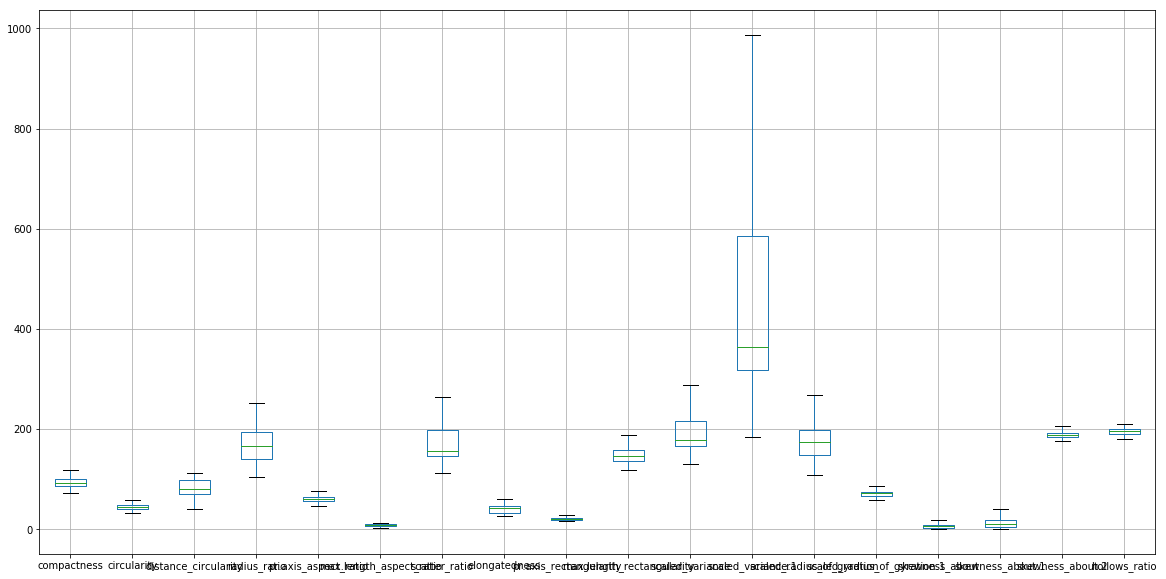

In [146]:
# Boxplot with removed ouliers
data1.boxplot(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001992C93AAC8>,
      dtype=object)

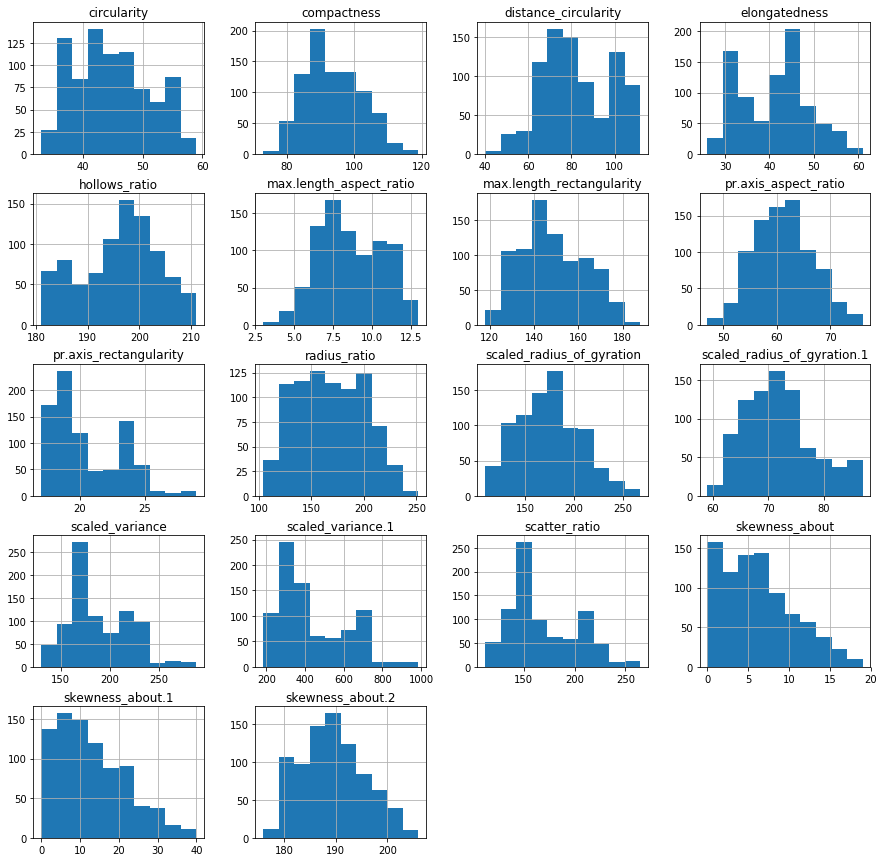

In [184]:
# data1.describe().T
data1.hist(figsize=(15,15))

C:\Users\ttc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


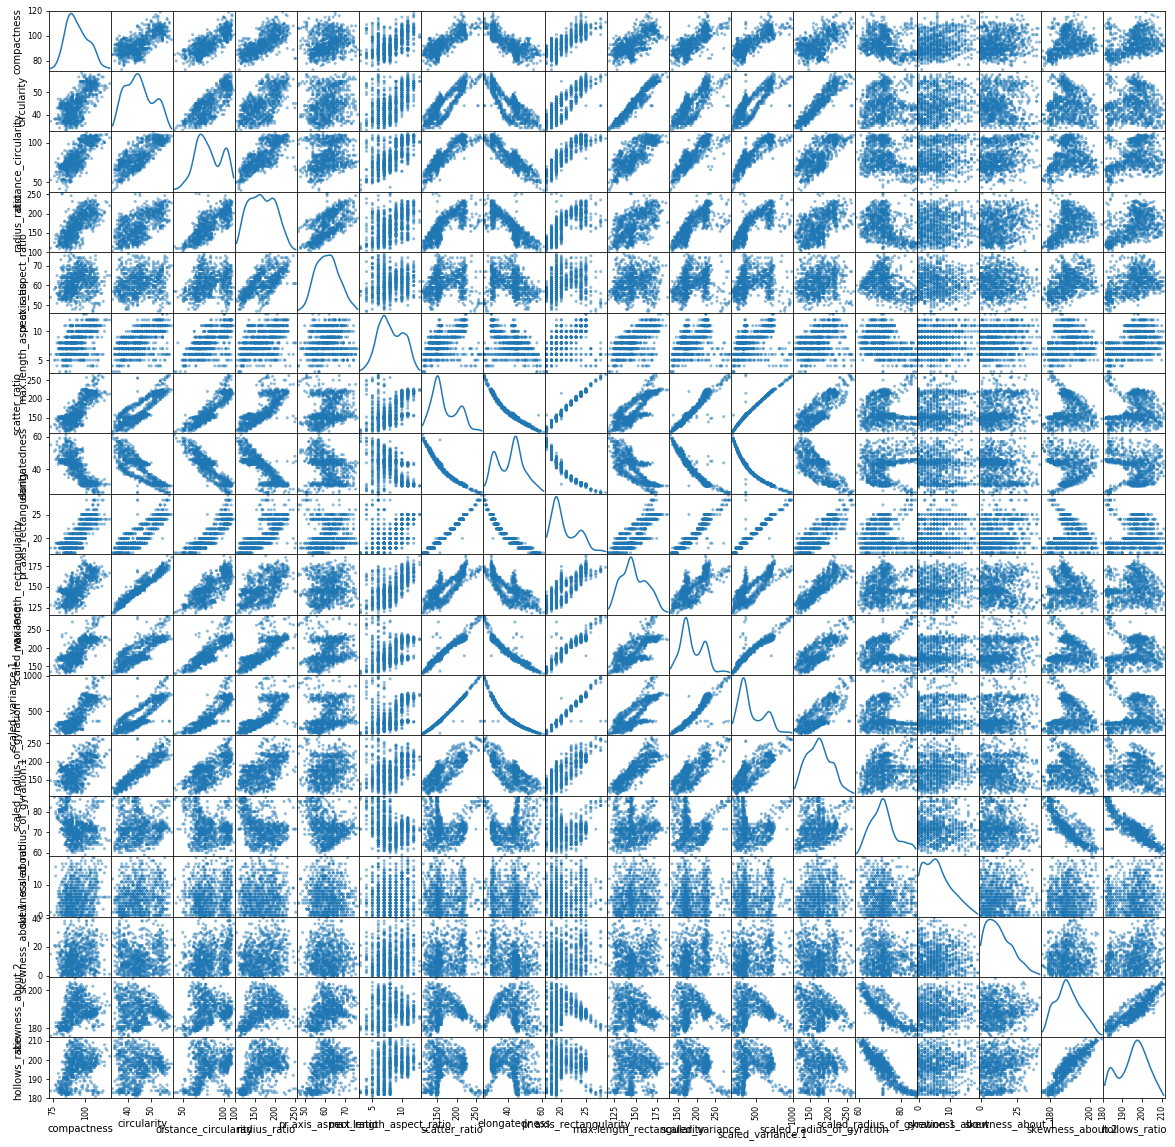

In [147]:
spd = pd.scatter_matrix(data1,figsize=(20,20),diagonal='kde')
# It can be infer from the pair plots that some of the data are linear either in positive direction or negative direction
# It means there is some sort of linearity or correlation between features.
# Thus we can reduce the dimension using principal components.
# Some features are having curvilinear relationship too.
# It can be said that the support vector machine with kernel type rbf is suitable as it will project data to hyperplane.
# As some of the features are having linearity with other features we can drop few of them.
# On visual check max 12 features are enough to chose from
# How 12 ? look at the first row 2,3,4,7,8,10,11(total 7) shows negative or positive relation between them so we can take 1 feature
# So total 18 - 7 + 1 = 12
# We will confirm it using PCA and elbow analysis.

In [148]:
# Finding correlation amoung features
cor = data1.corr()

In [149]:
cor
# It can seen that some features are highly correlated with max value being  0.989 pr.axis_rectangularity and scatter_ratio


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.684887,0.789928,0.721925,0.192864,0.499928,0.812620,-0.788750,0.813694,0.676143,0.769871,0.806170,0.585243,-0.246681,0.197308,0.156348,0.298537,0.365552
circularity,0.684887,1.000000,0.792320,0.638280,0.203253,0.560470,0.847938,-0.821472,0.843400,0.961318,0.802768,0.827462,0.925816,0.068745,0.136351,-0.009666,-0.104426,0.046351
distance_circularity,0.789928,0.792320,1.000000,0.794222,0.244332,0.666809,0.905076,-0.911307,0.893025,0.774527,0.869584,0.883943,0.705771,-0.229353,0.099107,0.262345,0.146098,0.332732
radius_ratio,0.721925,0.638280,0.794222,1.000000,0.650554,0.463958,0.769941,-0.825392,0.744139,0.579468,0.786183,0.760257,0.550774,-0.390459,0.035755,0.179601,0.405849,0.491758
pr.axis_aspect_ratio,0.192864,0.203253,0.244332,0.650554,1.000000,0.150295,0.194195,-0.298144,0.163047,0.147592,0.207101,0.196401,0.148591,-0.321070,-0.056030,-0.021088,0.400882,0.415734
max.length_aspect_ratio,0.499928,0.560470,0.666809,0.463958,0.150295,1.000000,0.490759,-0.504181,0.487931,0.642713,0.401391,0.463249,0.397397,-0.335444,0.081898,0.141664,0.083794,0.413174
scatter_ratio,0.812620,0.847938,0.905076,0.769941,0.194195,0.490759,1.000000,-0.971601,0.989751,0.809083,0.960883,0.980447,0.799875,0.011314,0.064242,0.211647,0.005628,0.118817
elongatedness,-0.788750,-0.821472,-0.911307,-0.825392,-0.298144,-0.504181,-0.971601,1.000000,-0.948996,-0.775854,-0.947644,-0.948851,-0.766314,0.078391,-0.046943,-0.183642,-0.115126,-0.216905
pr.axis_rectangularity,0.813694,0.843400,0.893025,0.744139,0.163047,0.487931,0.989751,-0.948996,1.000000,0.810934,0.947329,0.973606,0.796690,0.027545,0.073127,0.213801,-0.018649,0.099286
max.length_rectangularity,0.676143,0.961318,0.774527,0.579468,0.147592,0.642713,0.809083,-0.775854,0.810934,1.000000,0.750222,0.789632,0.866450,0.053856,0.130702,0.004129,-0.103948,0.076770


In [150]:
X = data1[data1.columns[:-1]]
y = data1['class']

# Seperating the features with target 

In [152]:
X.shape,y.shape

((846, 18), (846,))

In [153]:
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
# importing libraries

In [154]:
X_z = X.apply(zscore)
cov_X = np.cov(X_z.T)
print('Cov X\n ',cov_X)
# apllying zscore to normalize the features and finding covariance matrix

Cov X
  [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.80712401
   0.58593517 -0.24697246  0.19754181  0.1565327   0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.82844154
   0.92691166  0.06882659  0.13651201 -0.00967793 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.88498924
   0.70660663 -0.22962442  0.09922417  0.26265581  0.14627113  0.33312625]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.76115704
   0.55142559 -0.39092105  0.03579728  0.17981316  0.40632957  0.49234013]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.15047265
   0.19442484 -0.29849719  

In [156]:
eig_vals, eig_vecs = np.linalg.eig(cov_X)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.72502890e-01 -8.70435783e-02 -3.81852075e-02 -1.38675013e-01
   1.37101466e-01 -2.63611383e-01 -2.02717114e-01  7.58796410e-01
  -3.66685918e-01 -1.60045219e-01 -8.40252779e-02 -2.14645175e-02
   1.87350749e-02 -6.89082276e-02 -4.26105276e-02  9.97784975e-02
  -8.22590084e-02 -3.30366937e-02]
 [-2.87254690e-01  1.31621757e-01 -2.01146908e-01  3.80554832e-02
  -1.38995553e-01  7.13474241e-02  3.92275358e-01  6.76034223e-02
  -5.53261885e-02  1.82323962e-01  3.65229874e-02 -1.47247511e-01
   4.89102355e-02 -5.90534770e-02  6.74107885e-01  1.63466948e-01
  -2.59100771e-01  2.48832011e-01]
 [-3.02421105e-01 -4.61430061e-02  6.34621085e-02 -1.08954287e-01
  -8.00174278e-02  1.69006151e-02 -1.63371282e-01 -2.77371950e-01
  -7.46784853e-02 -2.73033778e-01 -4.68505530e-01 -6.52730855e-01
  -4.74162132e-03  1.62108150e-01  4.99754439e-04 -6.36582307e-02
   1.20629778e-01  9.80561531e-02]
 [-2.69713545e-01 -1.97931263e-01  5.62851689e-02  2.54355087e-01
   1.33744367e-01  

In [157]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Finding cumulative variance for eigen values

Cumulative Variance Explained [ 54.0993254   72.69242795  79.30893968  85.60048941  90.50578051
  94.2028816   95.96829741  97.23446089  97.96148159  98.40463444
  98.81191882  99.17047375  99.39323715  99.57233547  99.73544045
  99.86140541  99.97135127 100.        ]


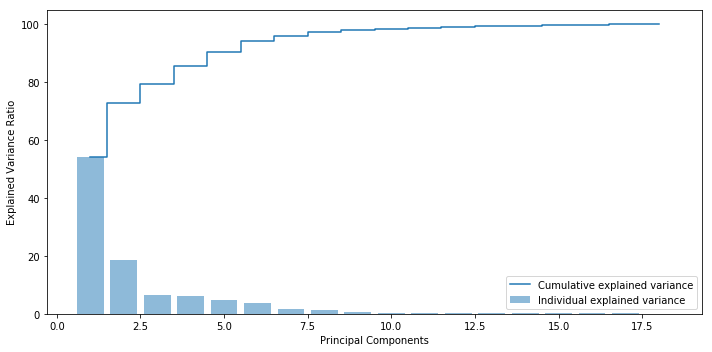

In [295]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [243]:
# As seen in plot above there is very little or negligible change in explained variance after 10 principle components.
# Hence 10 feature components will be enough to make insights from the data.
X_reduced = pd.DataFrame(PCA(n_components=10).fit_transform(X_z))
cov_matrix = np.cov(X_reduced.T)
print('Covariance Matrix \n%s', cov_matrix)
# the covariance between the features is almost zero
X_reduced.shape

Covariance Matrix 
%s [[ 9.74940269e+00 -1.75323267e-15  5.38162545e-16  3.78395540e-16
  -2.27037324e-16 -1.30336241e-16  7.14747131e-17  2.10219744e-17
   5.25549361e-17 -4.78249918e-17]
 [-1.75323267e-15  3.35071912e+00 -6.93725156e-17 -2.31241719e-16
  -3.76293342e-16 -3.53169170e-16  4.25694982e-17  8.19857003e-17
   9.27594622e-17 -6.62192195e-17]
 [ 5.38162545e-16 -6.93725156e-17  1.19238155e+00  6.07009512e-17
  -6.62192195e-17 -1.01956576e-16 -2.01810955e-16 -5.88615284e-17
  -8.11973762e-17  2.10219744e-17]
 [ 3.78395540e-16 -2.31241719e-16  6.07009512e-17  1.13381916e+00
  -3.48964776e-16 -2.99300361e-16 -1.71329092e-16  1.99708757e-17
   2.57519187e-17 -5.25549361e-18]
 [-2.27037324e-16 -3.76293342e-16 -6.62192195e-17 -3.48964776e-16
   8.83997312e-01  6.12265005e-17  2.57519187e-17  5.78104297e-17
  -1.62920302e-17  1.05109872e-17]
 [-1.30336241e-16 -3.53169170e-16 -1.01956576e-16 -2.99300361e-16
   6.12265005e-17  6.66265745e-01 -3.10074123e-17 -1.29022368e-16
   9.486165

(846, 10)

C:\Users\ttc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


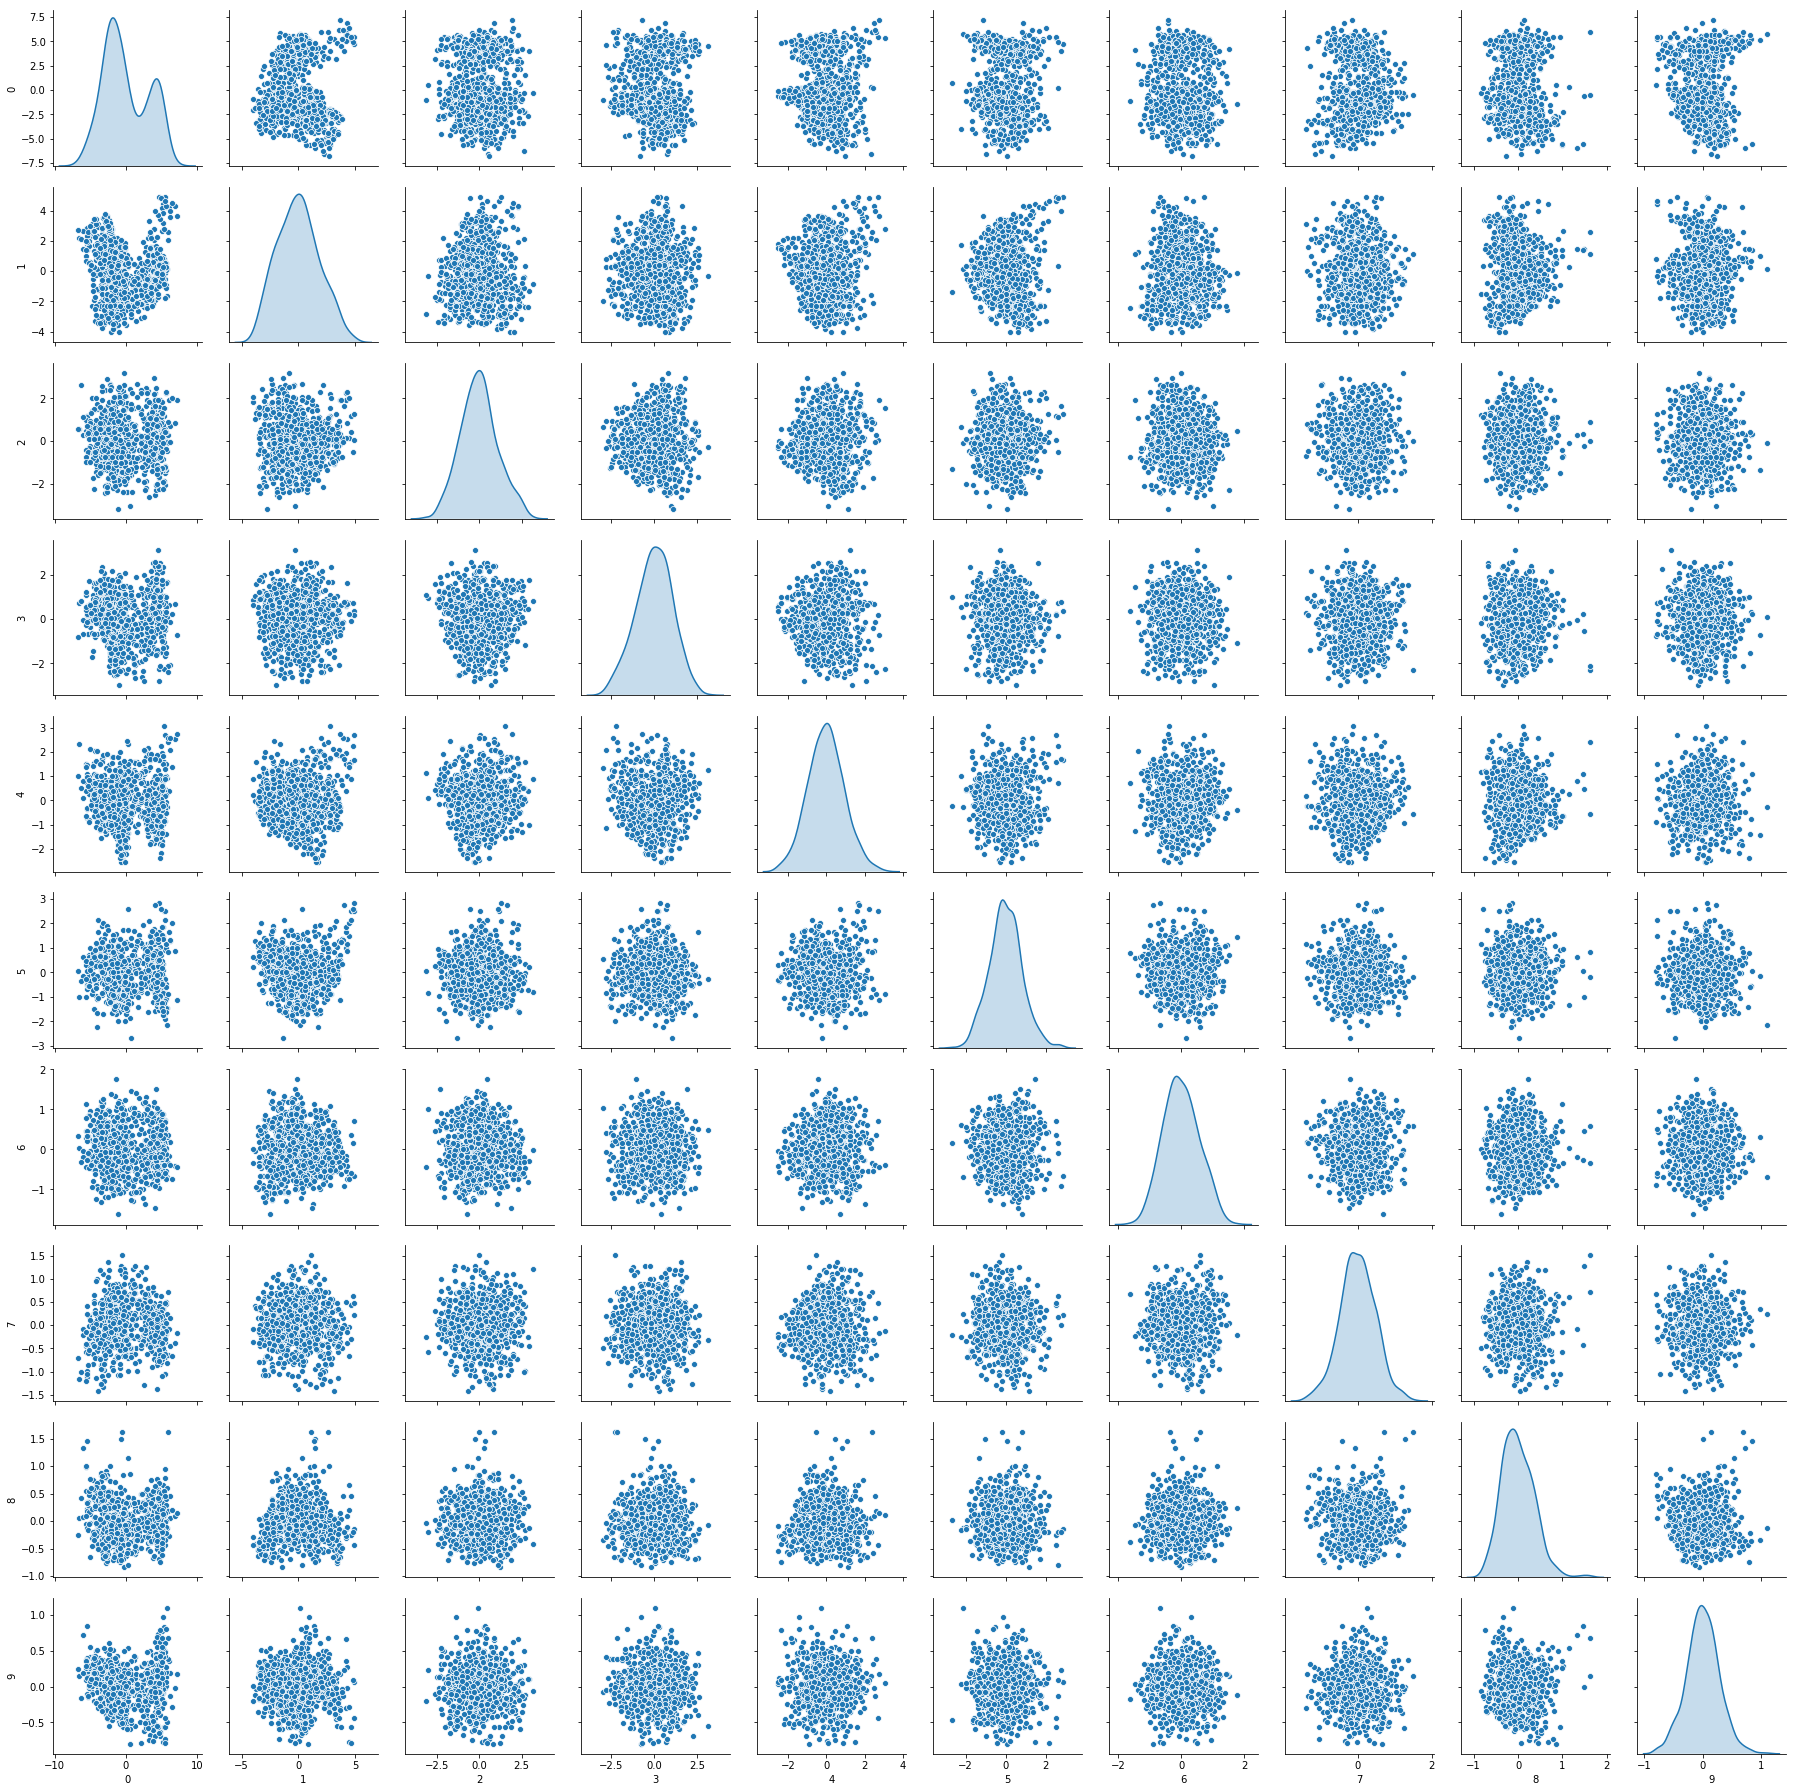

In [162]:
#Let us check it visually
# The Diagonal of the reduced dataset are shaped to normal gaussian after applying PCA 

import seaborn as sns
veh = X_reduced.iloc[:, :]
sns.pairplot(veh, diag_kind='kde') 

In [268]:
# Splitting data into training set and test set  
# the PCA transformed data is taken for train test split.

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3 , random_state=1)
X_train.shape,X_test.shape,X_reduced.shape

((592, 10), (254, 10), (846, 10))

In [266]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
# NOTE - we are generating only 10 PCA dimensions (dimensionality reduction from 18 to 10)
#Here we are first splitting the dataset X_z in train and test and then appliying PCA seperately on train and test sets.
X_train_z, X_test_z, y_train, y_test = train_test_split(X_z, y, test_size=0.3 , random_state=1)
X_train_reduced = PCA(n_components=10).fit_transform(X_train_z)
X_test_reduced = PCA(n_components=10).fit_transform(X_test_z)
X_train_reduced.shape,X_test_reduced.shape,X_train_z.shape

((592, 10), (254, 10), (592, 18))

In [267]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

In [293]:
# Using SVM as estimator
# Using GridSearch as Hyper parameter tuning tool using SVM estimator giving the best tuning parameter.
# 'C':[0.01,0.1,0.5,1],'kernel':['rbf','linear']
clf = SVC(gamma='auto')
param = {'C':[0.01,0.1,0.5,1],'kernel':['rbf','linear']}
grid_srch = GridSearchCV(clf,param_grid=param,verbose=5,cv=5)
grid_srch.fit(X_train,y_train)
print('Best Hyper param:\n',grid_srch.best_params_)
# Best Hyper param:
# {'C': 0.5, 'kernel': 'rbf'} with score max  94.9 %

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................... C=0.01, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.01, kernel=rbf, score=0.4957983193277311, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................... C=0.01, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................... C=0.01, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5042735042735043, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.875, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ... C=0.01, kernel=linear, score=0.865546218487395, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8898305084745762, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV] ... C=0.01, kernel=linear, score=0.864406779661017, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8632478632478633, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ...... C=0.1, kernel=rbf, score=0.8666666666666667, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ...... C=0.1, kernel=rbf, score=0.8739495798319328, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ...... C=0.1, kernel=rbf, score=0.8559322033898306, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ....... C=0.1, kernel=rbf, score=0.847457627118644, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ...... C=0.1, kernel=rbf, score=0.8376068376068376, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.2s finished


In [290]:
# using the above parameters of C using 10 fold cross validation
clf1 = SVC(C=0.01,kernel='linear',gamma='auto')
score = cross_val_score(clf1,X_reduced,y,cv=10)

clf2 = SVC(C=0.5,kernel='rbf',gamma='auto')
score1 = cross_val_score(clf2,X_reduced,y,cv=10)
score,score1

# C value corresponds to the errors larger the C values smaller is the margin accross support vector.
# Kernel gives the option to choose the type of projection in n dimensional space like linear,radial basis function,sigmoid. 

(array([0.81176471, 0.85882353, 0.87058824, 0.85882353, 0.87058824,
        0.88235294, 0.84705882, 0.90588235, 0.91666667, 0.85365854]),
 array([0.91764706, 0.96470588, 0.94117647, 0.95294118, 0.96470588,
        0.96470588, 0.91764706, 0.96470588, 0.95238095, 0.95121951]))

In [264]:
# using GNB as classifier with 10 folds cross validation
gnb = GaussianNB()
score = cross_val_score(gnb,X_reduced,y,cv=10)
score

array([0.85882353, 0.83529412, 0.8       , 0.85882353, 0.8       ,
       0.85882353, 0.82352941, 0.81176471, 0.89285714, 0.86585366])

In [289]:
## implementing SVC on dataset where features are first scaled using zscore and then split into train and test set 
# the train and test data are then applied to PCA for 10 components
clf3 = SVC(C=.05,kernel='rbf',gamma='auto')
clf3.fit(X_train_reduced,y_train)
pred_y = clf3.predict(X_test_reduced)
print (metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

         bus       0.14      0.02      0.03        59
         car       0.52      0.93      0.66       133
         van       0.57      0.06      0.12        62

   micro avg       0.51      0.51      0.51       254
   macro avg       0.41      0.34      0.27       254
weighted avg       0.44      0.51      0.38       254



In [273]:
clf3.score(X_test_reduced,y_test)

0.5078740157480315

In [231]:
from sklearn import metrics

In [286]:
# implementing SVC on dataset where features are first scaled using zscore and then apllied PCA and split into train and test set 
clf4 = SVC(C=.5,kernel='rbf',gamma='auto')
clf4.fit(X_train,y_train)
predy = clf4.predict(X_test)
print (metrics.classification_report(y_test, predy))
clf4.score(X_test,y_test)

              precision    recall  f1-score   support

         bus       0.95      0.97      0.96        59
         car       0.93      0.97      0.95       133
         van       0.93      0.84      0.88        62

   micro avg       0.94      0.94      0.94       254
   macro avg       0.94      0.92      0.93       254
weighted avg       0.94      0.94      0.94       254



0.937007874015748

In [278]:
clf4.score(X_test,y_test)

0.937007874015748

In [ ]:
# Observation :
# Better results are given when the entire dataset features is first applied to PCA for dimension reduction ( here 18 to 10)
# Score for SVC when train and test data are seperately applied for PCA is less as compare to when whole data features are..
#.. first exposed to PCA and then doing split into train and test.This is new finding
# SVC is used as the no of records are less and much variation is available in features.
# The model predict the bus with 95% , car with 93 % and van with 95%.
# The model is doing in classifying vehicle type with avg 93% score